<a href="https://colab.research.google.com/github/pmudliar-ai/pmudliar/blob/main/%E2%80%9CCancer_Hospital_Readmission_Analysis_%E2%80%93_EDA_on_Patient_Data%E2%80%9Dpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# ============================================
# 🩺 Cancer Hospital Readmission Analysis
# Exploratory Data Analysis + Prediction Model
# ============================================


In [44]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#load dataset
df = pd.read_csv('/colorectal_cancer_dataset.csv')
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (167497, 28)


,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [24]:
# Data Info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,167497.000000,167497.00000,167497.000000,167497.000000,167497.000000,167497.000000
mean,83749.000000,69.20078,42.005708,72452.168099,34.531562,17.023875
std,48352.363357,11.87247,21.672206,27402.779597,14.447970,7.208766
min,1.000000,30.00000,5.000000,25000.000000,10.000000,5.000000
25%,41875.000000,59.00000,23.000000,48760.000000,22.000000,11.000000
50%,83749.000000,69.00000,42.000000,72344.000000,35.000000,17.000000
75%,125623.000000,79.00000,61.000000,96227.000000,47.000000,23.000000
max,167497.000000,89.00000,79.000000,119999.000000,59.000000,29.000000


In [25]:
#Data overview
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

Missing values:
 Series([], dtype: int64)


In [27]:
#Data cleaning
df = df.drop_duplicates()
df = df.dropna(subset=['Age', 'Gender', 'Cancer_Stage'])
df.columns = df.columns.str.lower()

In [14]:
essential_cols = ['Age', 'Gender', 'Cancer_Stage']
df = df.dropna(subset=essential_cols)
print("After cleaning:", df.shape)

After cleaning: (167497, 28)


In [15]:
df.columns = df.columns.str.lower()

In [31]:
#Create re-admission flag
import numpy as np

if 'hospital_visits' in df.columns:
    df['readmission'] = df['hospital_visits'].apply(lambda x: 1 if x > 1 else 0)
else:
    np.random.seed(42)
    df['readmission'] = np.random.choice([0,1], len(df))

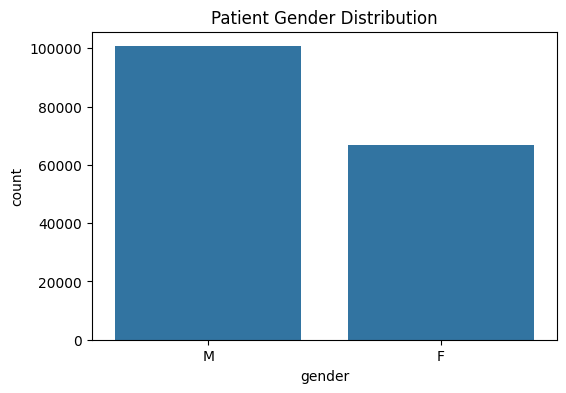

In [29]:
# Exploratory Data Analysis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender')
plt.title('Patient Gender Distribution')
plt.show()

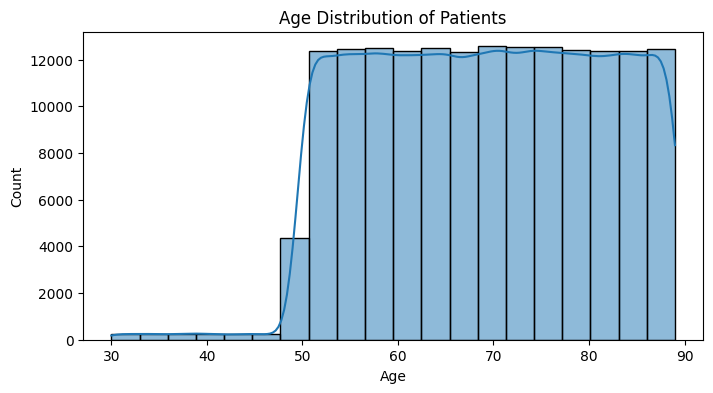

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.show()

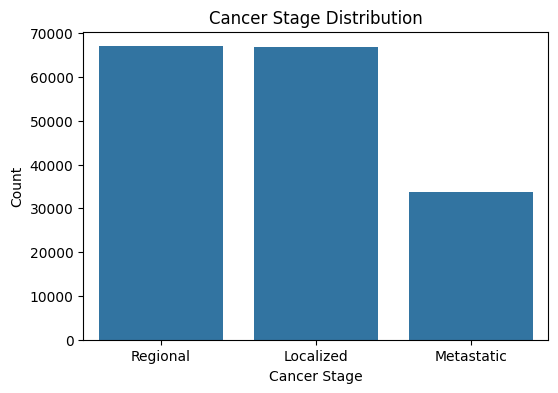

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='cancer_stage', order=df['cancer_stage'].value_counts().index)
plt.title('Cancer Stage Distribution')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.show()

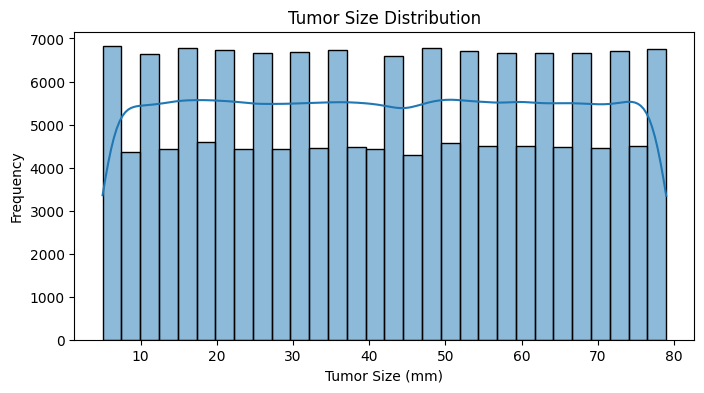

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(df['tumor_size_mm'], bins=30, kde=True)
plt.title('Tumor Size Distribution')
plt.xlabel('Tumor Size (mm)')
plt.ylabel('Frequency')
plt.show()

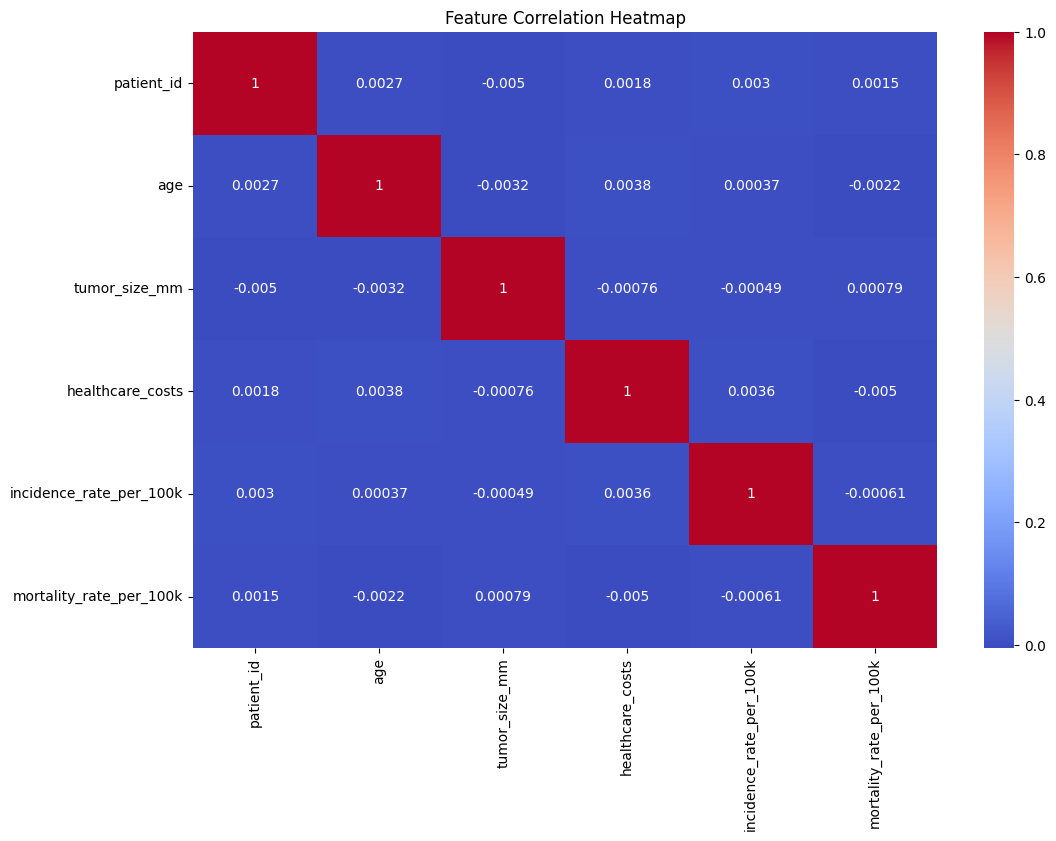

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

In [34]:
#Model prep
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop('readmission', axis=1)
y = df['readmission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
#Train Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
#Evaluate Models
from sklearn.metrics import accuracy_score, classification_report

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Logistic Regression ===
Accuracy: 0.4948059701492537
              precision    recall  f1-score   support

           0       0.49      0.47      0.48     16732
           1       0.50      0.52      0.51     16768

    accuracy                           0.49     33500
   macro avg       0.49      0.49      0.49     33500
weighted avg       0.49      0.49      0.49     33500


=== Random Forest ===
Accuracy: 0.4949850746268657
              precision    recall  f1-score   support

           0       0.49      0.53      0.51     16732
           1       0.50      0.46      0.48     16768

    accuracy                           0.49     33500
   macro avg       0.49      0.50      0.49     33500
weighted avg       0.49      0.49      0.49     33500



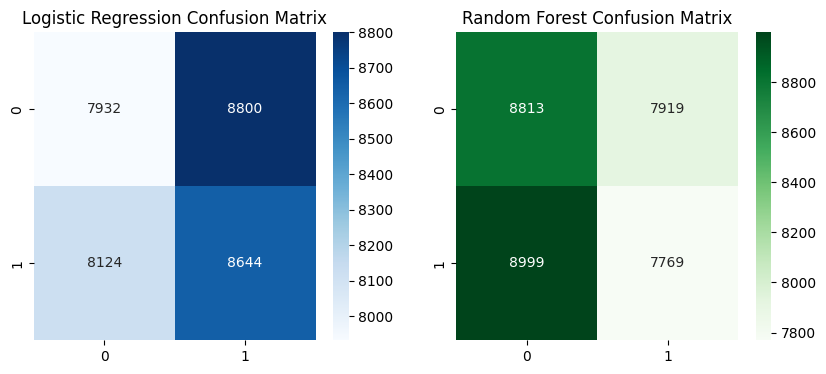

In [41]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()

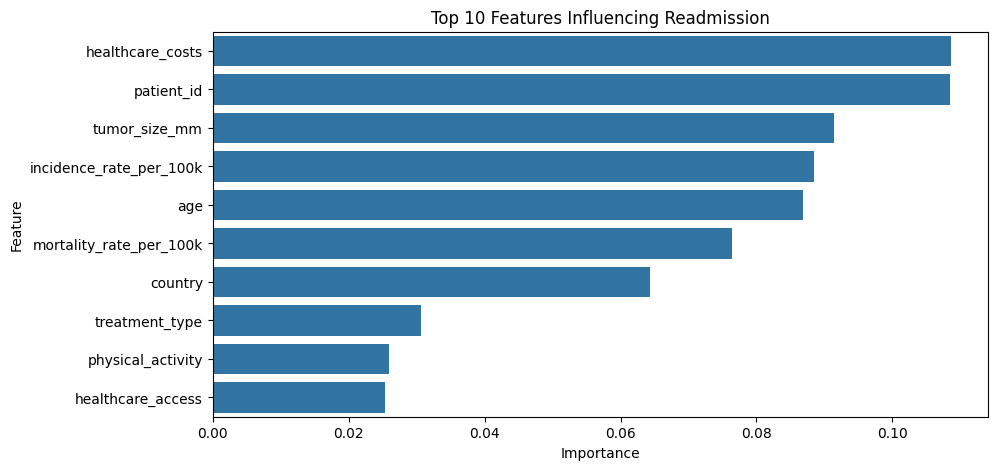

✅ Cancer Hospital Readmission Analysis Complete!


In [42]:
#Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Features Influencing Readmission')
plt.show()

print("✅ Cancer Hospital Readmission Analysis Complete!")